In [2]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
#getting data
airline=pd.read_excel("C:/Users/Yogendra/Downloads/EastWestAirlines.xlsx")
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
scaler = StandardScaler()
scaled_air = scaler.fit_transform(airline.iloc[:,1:])

In [81]:
dbscan = DBSCAN(eps=4, min_samples=4)
dbscan.fit(scaled_air)

DBSCAN(eps=4, min_samples=4)

In [82]:
silhouette_score(scaled_air, dbscan.labels_)

0.5391197790859014

In [83]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
airline['clusterid_new'] = dbscan.labels_

In [85]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


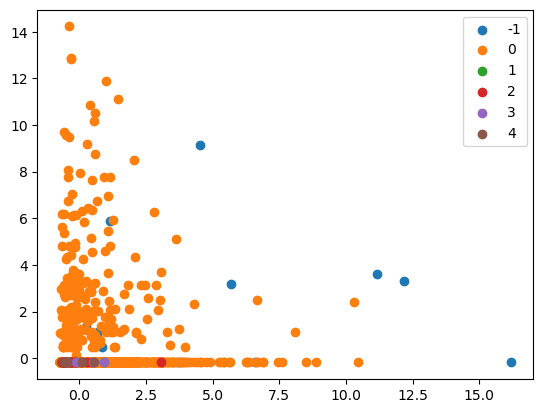

In [86]:
ulabel=np.unique(dbscan.labels_)
for i in ulabel:
    plt.scatter(scaled_air[dbscan.labels_ == i , 0] , scaled_air[dbscan.labels_ == i , 1] , label = i)
plt.legend()
plt.show()